In [34]:
using DifferentialEquations
using BenchmarkTools
using ForwardDiff
using Zygote
using SciMLSensitivity
using FiniteDiff
using Plots

First study the sensitivities of the Lotka-Volterra ODE regarding its initial state $x_0$ and parameters $w$.

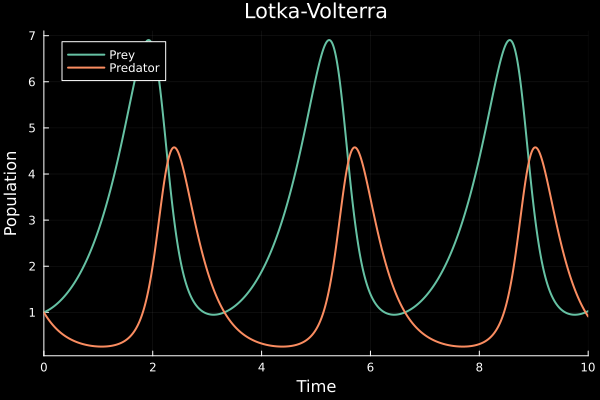

In [35]:
function lotka_volterra!(dx, x, w, t)
    dx[1]  = w[1] * x[1] - w[2] * x[1] * x[2]
    dx[2]  = -w[3] * x[2] + w[4] * x[1] * x[2]
end
w = [1.5, 1.0, 3.0, 1.0];
x0 = [1.0; 1.0];
tspan = (0.0, 10.0);
prob = ODEProblem(lotka_volterra!, x0, tspan, w)
sol = solve(prob, Tsit5(), dt=1/20, adaptive=false)
plot(sol, lw=2,background_color="#000000", palette = :Set2_5, title="Lotka-Volterra", xlabel="Time", ylabel="Population", label=["Prey" "Predator"])

To study the sensitivity of both $x_0$ and $w$ we define a new function `f()` which takes as an input the two variables.

In [36]:
function f(u)
    _prob = remake(prob, u0 = u[1:2], p = u[3:end])
    solve(_prob, Tsit5(), dt=1/20, adaptive=false)[1, :]
end
u = [x0; w];

Let's calculate the sensitivity of the solution with respect to $x_0$ and $w$, that is, calculating the Jacobian. We will perform this operation using the following methods:
 * [ForwardDiff.jl](https://github.com/JuliaDiff/ForwardDiff.jl),
 * [Zygote.jl (backward mode)](https://github.com/FluxML/Zygote.jl),
 * [FiniteDiff.jl](https://github.com/JuliaDiff/FiniteDiff.jl).

The following solution has as many rows as time steps of the ODE solution and as many columns as the number of considered parameters. Hence, we can study how sensitive the system response trajectory is to each parameter and how this sensitivity changes over time. Based on the previous definition of `f(u)` we compute the sensitivity with respect to $x_1(t)$.

In [37]:
du = ForwardDiff.jacobian(f, u)

201×6 Matrix{Float64}:
  1.0         0.0         0.0         0.0         0.0          0.0
  1.02657    -0.0488943   0.0513692  -0.0488943   0.00120237  -0.00121286
  1.05634    -0.0961057   0.105951   -0.0961057   0.00465106  -0.00473573
  1.08936    -0.142333    0.164455   -0.142333    0.0101709   -0.0104598
  1.12568    -0.188174    0.227595   -0.188174    0.0176558   -0.0183493
  1.16534    -0.234146    0.296101   -0.234146    0.027055    -0.0284303
  1.20839    -0.280708    0.370721   -0.280708    0.0383639   -0.0407823
  1.25486    -0.328274    0.452232   -0.328274    0.0516174   -0.0555346
  1.30478    -0.377221    0.541442   -0.377221    0.0668852   -0.072864
  1.35817    -0.427901    0.639191   -0.427901    0.0842694   -0.092995
  1.41503    -0.480645    0.74636    -0.480645    0.103903    -0.116202
  1.47534    -0.535768    0.863865   -0.535768    0.125949    -0.142815
  1.53905    -0.593575    0.992659   -0.593575    0.150604    -0.173221
  ⋮                                  

In [38]:
Zygote.jacobian(f, u)[1]

201×6 Matrix{Float64}:
  1.0         0.0         0.0         0.0         0.0          0.0
  1.02657    -0.0488943   0.0513692  -0.0488943   0.00120237  -0.00121286
  1.05634    -0.0961057   0.105951   -0.0961057   0.00465106  -0.00473573
  1.08936    -0.142333    0.164455   -0.142333    0.0101709   -0.0104598
  1.12568    -0.188174    0.227595   -0.188174    0.0176558   -0.0183493
  1.16534    -0.234146    0.296101   -0.234146    0.027055    -0.0284303
  1.20839    -0.280708    0.370721   -0.280708    0.0383639   -0.0407823
  1.25486    -0.328274    0.452232   -0.328274    0.0516174   -0.0555346
  1.30478    -0.377221    0.541442   -0.377221    0.0668852   -0.072864
  1.35817    -0.427901    0.639191   -0.427901    0.0842694   -0.092995
  1.41503    -0.480645    0.74636    -0.480645    0.103903    -0.116202
  1.47534    -0.535768    0.863865   -0.535768    0.125949    -0.142815
  1.53905    -0.593575    0.992659   -0.593575    0.150604    -0.173221
  ⋮                                  

In [39]:
FiniteDiff.finite_difference_jacobian(f, u)

201×6 Matrix{Float64}:
  1.0         0.0         0.0         0.0         0.0          0.0
  1.02657    -0.0488943   0.0513692  -0.0488943   0.00120236  -0.00121285
  1.05634    -0.0961057   0.105951   -0.0961057   0.00465106  -0.00473572
  1.08936    -0.142333    0.164455   -0.142333    0.0101709   -0.0104597
  1.12568    -0.188174    0.227595   -0.188174    0.0176558   -0.0183493
  1.16534    -0.234146    0.296101   -0.234146    0.027055    -0.0284303
  1.20839    -0.280708    0.370721   -0.280708    0.0383639   -0.0407823
  1.25486    -0.328274    0.452232   -0.328274    0.0516174   -0.0555346
  1.30478    -0.377221    0.541442   -0.377221    0.0668852   -0.072864
  1.35817    -0.427901    0.639191   -0.427901    0.0842694   -0.0929949
  1.41503    -0.480645    0.74636    -0.480645    0.103903    -0.116202
  1.47534    -0.535768    0.863865   -0.535768    0.125949    -0.142815
  1.53905    -0.593575    0.992659   -0.593575    0.150604    -0.173221
  ⋮                                 

Obviously, the results of all three approaches seems quite similar. However, the performance is quite different:

In [40]:
@benchmark ForwardDiff.jacobian(f, u)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  101.000 μs … 41.407 ms  ┊ GC (min … max):  0.00% … 99.31%
 Time  (median):     213.700 μs              ┊ GC (median):     0.00%
 Time  (mean ± σ):   255.861 μs ±  1.086 ms  ┊ GC (mean ± σ):  14.55% ±  3.43%

               ▄█▇▅▂                                            
  ▂▇█▆▃▂▂▁▁▂▄▄▆█████▇▅▄▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  101 μs          Histogram: frequency by time          550 μs <

 Memory estimate: 328.97 KiB, allocs estimate: 1856.

In [41]:
@benchmark Zygote.jacobian(f, u)[1]

BenchmarkTools.Trial: 36 samples with 1 evaluation.
 Range (min … max):  118.947 ms … 172.279 ms  ┊ GC (min … max): 0.00% … 18.82%
 Time  (median):     136.175 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   139.143 ms ±  15.170 ms  ┊ GC (mean ± σ):  4.85% ±  7.93%

  ▃   █    █    ▃  ▃                                             
  █▇▇▁█▁▁▁▇█▁▁▇▁█▁▇█▁▇▇▇▇▇▁▁▇▇▇▁▁▁▇▇▇▇▁▁▁▇▁▁▁▁▇▁▁▇▁▁▁▁▇▁▇▁▁▁▇▁▇ ▁
  119 ms           Histogram: frequency by time          172 ms <

 Memory estimate: 63.68 MiB, allocs estimate: 879868.

In [42]:
@benchmark FiniteDiff.finite_difference_jacobian(f, u)

BenchmarkTools.Trial: 5250 samples with 1 evaluation.
 Range (min … max):  493.200 μs … 39.152 ms  ┊ GC (min … max):  0.00% … 95.49%
 Time  (median):     736.550 μs              ┊ GC (median):     0.00%
 Time  (mean ± σ):   943.499 μs ±  2.219 ms  ┊ GC (mean ± σ):  15.04% ±  6.28%

    ▇█▆▄▂             ▁                                         
  ▁▇█████▇▆▄▄▃▂▂▂▂▅▇▇▇█▇▆▆▅▅▅▄▃▃▂▂▂▂▂▂▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▃
  493 μs          Histogram: frequency by time         1.73 ms <

 Memory estimate: 1.13 MiB, allocs estimate: 13010.

In the above example, we considered only a few parameters as inputs to the sensitivity study, but the investigated function had many outputs, that is, the solution of the ODE over time. Next, we are going to change this and consider only one output (dummy cost function), while the number of parameters remains unchanged.

In [43]:
function cost(u)
    sol = f(u)
    return sum(sol.^2)
end

cost (generic function with 1 method)

Based on this new output function, we are interested in the gradient of the cost as typically required for optimization procedures.

In [44]:
ForwardDiff.gradient(cost, u)

6-element Vector{Float64}:
 -1436.0605058265485
  -360.1103971875764
  -593.9523905158244
  -360.1103971875766
  1830.6003177590921
 -6609.179605938831

In [45]:
Zygote.gradient(cost, u)[1]

6-element Vector{Float64}:
 -1436.0605058265485
  -360.1103971875764
  -593.9523905158244
  -360.1103971875766
  1830.6003177590921
 -6609.179605938831

In [46]:
FiniteDiff.finite_difference_gradient(cost, u)

6-element Vector{Float64}:
 -1436.060505985561
  -360.11039712740904
  -593.9523904666906
  -360.1103972400548
  1830.6003177541518
 -6609.17960682546

While the results are again more or less identifical, we are also interested in the computational cost of the different methods. 

In [47]:
@benchmark ForwardDiff.gradient(cost, u)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):   97.100 μs … 32.155 ms  ┊ GC (min … max):  0.00% … 99.19%
 Time  (median):     203.900 μs              ┊ GC (median):     0.00%
 Time  (mean ± σ):   238.276 μs ±  1.034 ms  ┊ GC (mean ± σ):  14.95% ±  3.43%

                ▄█▅▂                                            
  ▄▆▅▃▂▁▁▁▁▁▁▁▃▇████▅▄▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  97.1 μs         Histogram: frequency by time          507 μs <

 Memory estimate: 330.66 KiB, allocs estimate: 1860.

In [48]:
@benchmark Zygote.gradient(cost, u)[1]

BenchmarkTools.Trial: 5525 samples with 1 evaluation.
 Range (min … max):  662.800 μs … 35.599 ms  ┊ GC (min … max): 0.00% … 96.25%
 Time  (median):     788.400 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   900.340 μs ±  1.379 ms  ┊ GC (mean ± σ):  6.38% ±  4.09%

     ▆█▆▂                                                       
  ▁▃▇█████▆▆▇▆▇▆▄▄▄▃▃▂▂▂▂▂▂▁▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  663 μs          Histogram: frequency by time         1.65 ms <

 Memory estimate: 517.38 KiB, allocs estimate: 6603.

In [49]:
@benchmark FiniteDiff.finite_difference_gradient(cost, u)

BenchmarkTools.Trial: 3053 samples with 1 evaluation.
 Range (min … max):  849.700 μs … 42.489 ms  ┊ GC (min … max):  0.00% … 95.64%
 Time  (median):       1.333 ms              ┊ GC (median):     0.00%
 Time  (mean ± σ):     1.628 ms ±  2.901 ms  ┊ GC (mean ± σ):  14.51% ±  7.89%

    ▇██▄▁         ▂▄▁▁                                          
  ▅██████▅▅▄▃▄▄▃▅▇████▆▆▇▅▄▄▄▃▃▃▃▃▃▃▂▂▂▂▃▂▂▂▂▂▂▂▂▂▁▂▂▂▁▂▂▂▁▂▁▂ ▄
  850 μs          Histogram: frequency by time         3.35 ms <

 Memory estimate: 1.86 MiB, allocs estimate: 22299.

Finally, we will study a different ODE which right-hand side is represented by an (arbitrary) artificial neural network.

In [50]:
using Flux

In [51]:
dudtNN = Flux.Chain(  # simple neural network with 502 weights
    Flux.Dense(2, 100, tanh),
    Flux.Dense(100, 2))
w_NN, re = Flux.destructure(dudtNN) 
dudt(x, w_NN, t) = re(w_NN)(x) # need to restrcture for backprop!
prob = ODEProblem(dudt, x0, tspan)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: false
timespan: (0.0, 10.0)
u0: 2-element Vector{Float64}:
 1.0
 1.0

In [52]:
solve(prob, Tsit5(), u0 = x0, p = w_NN, dt=1/20, adaptive=false)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 201-element Vector{Float64}:
  0.0
  0.05
  0.1
  0.15000000000000002
  0.2
  0.25
  0.3
  0.35
  0.39999999999999997
  0.44999999999999996
  0.49999999999999994
  0.5499999999999999
  0.6
  ⋮
  9.45
  9.5
  9.55
  9.600000000000001
  9.650000000000002
  9.700000000000003
  9.750000000000004
  9.800000000000004
  9.850000000000005
  9.900000000000006
  9.950000000000006
 10.0
u: 201-element Vector{Vector{Float64}}:
 [1.0, 1.0]
 [1.0078597234839517, 0.998412468337164]
 [1.015703403082438, 0.996846131758441]
 [1.0235311915565706, 0.9953008584172204]
 [1.0313432524095143, 0.9937765762886448]
 [1.0391397420671453, 0.9922731669095528]
 [1.0469208654086093, 0.9907905243430117]
 [1.0546867411571947, 0.9893285253785483]
 [1.0624375394265417, 0.9878870901807333]
 [1.0701734307259356, 0.9864661028896433]
 [1.0778945779237932, 0.985065479348357]
 [1.0856011303955861, 0.983685104769524]
 [1.0932932438140281, 0.9823248489

In [53]:
function f_NN(w)
    _prob = remake(prob, u0 = x0, p = w)
    solve(_prob, Tsit5(), dt=1/20, adaptive=false)[1, :]
end

f_NN (generic function with 1 method)

In [54]:
# build a dummy cost function which returns the squared sum of the ODE solution
function cost_NN(w)
    sol = f_NN(w)
    return sum(sol.^2)
end

cost_NN (generic function with 1 method)

In [55]:
ForwardDiff.gradient(cost_NN, w_NN)

502-element Vector{Float32}:
  -623.7336
   154.3754
   799.5925
 -1659.995
 -1070.3024
 -1425.1508
 -1158.6315
  1822.1908
 -1075.5433
 -1303.7241
   865.90344
  -523.344
   748.37744
     ⋮
   502.0181
   224.79822
  1396.4349
   552.18884
 -1353.9757
  -534.65936
    48.359142
     5.589294
  1902.2053
   764.6872
  3962.0361
  1660.5586

In [56]:
Zygote.gradient(cost_NN, w_NN)[1]

502-element Vector{Float32}:
  -623.7338
   154.3755
   799.5926
 -1659.9955
 -1070.303
 -1425.1515
 -1158.6321
  1822.1919
 -1075.5438
 -1303.7249
   865.9036
  -523.3443
   748.37775
     ⋮
   502.01852
   224.79837
  1396.4354
   552.18896
 -1353.9763
  -534.65955
    48.359127
     5.589273
  1902.2057
   764.6871
  3962.0378
  1660.5592

In [57]:
@benchmark Zygote.gradient(cost_NN, w_NN)[1]

BenchmarkTools.Trial: 85 samples with 1 evaluation.
 Range (min … max):  44.442 ms … 93.368 ms  ┊ GC (min … max):  0.00% …  0.00%
 Time  (median):     55.227 ms              ┊ GC (median):     0.00%
 Time  (mean ± σ):   58.785 ms ± 11.255 ms  ┊ GC (mean ± σ):  10.15% ± 16.54%

        ▂  ▄▄ █  ▂ ▆                                           
  ▆▆▄▆▄██▆█████▆▄███▆▆▄▆▁▁▄▁▁▄▆▆▄▁▄▄▁▄▁▄▄▁▄▄▁▄▁▁▄▁▁▁▁▁▄▄▁▄▁▄▄ ▁
  44.4 ms         Histogram: frequency by time        89.1 ms <

 Memory estimate: 52.75 MiB, allocs estimate: 298919.

In [58]:
@benchmark ForwardDiff.gradient(cost_NN, w_NN)

BenchmarkTools.Trial: 4 samples with 1 evaluation.
 Range (min … max):  1.594 s …   1.765 s  ┊ GC (min … max): 12.04% … 11.27%
 Time  (median):     1.656 s              ┊ GC (median):    11.80%
 Time  (mean ± σ):   1.667 s ± 75.391 ms  ┊ GC (mean ± σ):  11.82% ±  0.56%

  █         █                   █                         █  
  █▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  1.59 s         Histogram: frequency by time        1.76 s <

 Memory estimate: 3.73 GiB, allocs estimate: 3735443.